### Random forest
---

In [1]:
from funkcije import *

2023/07/28 12:53:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/07/28 12:53:45 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [2]:
nemci = pd.read_csv("baza_labelirana.csv")

In [3]:
# for i in nemci.columns.values:
    # print("'" + i  + "'" + ',', end='')

In [3]:
# print(nemci.columns.values.tolist())

In [4]:
# X = nemci[["hurstovi", "duzine",
#             "odnos_tišine_i_govora", "najduža_priča",	"zcr_prosek",
#             "zcr_min",	"zcr_max",	"zcr_med",	"zcr_stdev",	"pitch_prosek",
#             "pitch_min",	"pitch_max",	"pitch_med",	"pitch_stdev",	"energija_prosek",	"energija_min",
#             "energija_max",	"energija_stdev", "eng_bez_tis",	"eng_bez_tis_avg",	"eng_bez_tis_min",
#             "eng_bez_tis_max",	"eng_bez_tis_med",	"eng_bez_tis_stdev",	"energija_ukupna"]]

# X = nemci[[
#            'hurstovi','duzine','odnos_tišine_i_govora',
#            'najduža_priča','zcr_prosek','zcr_min',
#            'zcr_max','zcr_med','zcr_stdev',
#            'pitch_prosek','pitch_min','pitch_max',
#            'pitch_med','pitch_stdev','energija_prosek','energija_min','energija_max'
#            ,'energija_stdev','eng_bez_tis','eng_bez_tis_avg','eng_bez_tis_min','eng_bez_tis_max',
#            'eng_bez_tis_med','eng_bez_tis_stdev','energija_ukupna'
#            ]] ### na ovome smo radili pre, sad ide sa mfcc-ovima


X = nemci[[ 'hurstovi', 'duzine', 'odnos_tišine_i_govora', 'najduža_priča', 'zcr_prosek', 'zcr_min', 'zcr_max', 'zcr_med', 'zcr_stdev', 'pitch_prosek', 'pitch_min', 'pitch_max', 'pitch_med', 'pitch_stdev', 'energija_prosek', 'energija_min', 'energija_max', 'energija_stdev', 'eng_bez_tis', 'eng_bez_tis_avg', 'eng_bez_tis_min', 'eng_bez_tis_max', 'eng_bez_tis_med', 'eng_bez_tis_stdev', 'energija_ukupna', 'mfcc_mean_1', 'mfcc_min_1', 'mfcc_max_1', 'mfcc_med_1', 'mfcc_var_1', 'mfcc_mean_2', 'mfcc_min_2', 'mfcc_max_2', 'mfcc_med_2', 'mfcc_var_2', 'mfcc_mean_3', 'mfcc_min_3', 'mfcc_max_3', 'mfcc_med_3', 'mfcc_var_3', 'mfcc_mean_4', 'mfcc_min_4', 'mfcc_max_4', 'mfcc_med_4', 'mfcc_var_4', 'mfcc_mean_5', 'mfcc_min_5', 'mfcc_max_5', 'mfcc_med_5', 'mfcc_var_5', 'mfcc_mean_6', 'mfcc_min_6', 'mfcc_max_6', 'mfcc_med_6', 'mfcc_var_6', 'mfcc_mean_7', 'mfcc_min_7', 'mfcc_max_7', 'mfcc_med_7', 'mfcc_var_7', 'mfcc_mean_8', 'mfcc_min_8', 'mfcc_max_8', 'mfcc_med_8', 'mfcc_var_8', 'mfcc_mean_9', 'mfcc_min_9', 'mfcc_max_9', 'mfcc_med_9', 'mfcc_var_9', 'mfcc_mean_10', 'mfcc_min_10', 'mfcc_max_10', 'mfcc_med_10', 'mfcc_var_10', 'mfcc_mean_11', 'mfcc_min_11', 'mfcc_max_11', 'mfcc_med_11', 'mfcc_var_11', 'mfcc_mean_12', 'mfcc_min_12', 'mfcc_max_12', 'mfcc_med_12', 'mfcc_var_12', 'mfcc_mean_13', 'mfcc_min_13', 'mfcc_max_13', 'mfcc_med_13', 'mfcc_var_13', 'mfcc_mean_14', 'mfcc_min_14', 'mfcc_max_14', 'mfcc_med_14', 'mfcc_var_14', 'mfcc_mean_15', 'mfcc_min_15', 'mfcc_max_15', 'mfcc_med_15', 'mfcc_var_15', 'mfcc_mean_16', 'mfcc_min_16', 'mfcc_max_16', 'mfcc_med_16', 'mfcc_var_16', 'mfcc_mean_17', 'mfcc_min_17', 'mfcc_max_17', 'mfcc_med_17', 'mfcc_var_17', 'mfcc_mean_18', 'mfcc_min_18', 'mfcc_max_18', 'mfcc_med_18', 'mfcc_var_18', 'mfcc_mean_19', 'mfcc_min_19', 'mfcc_max_19', 'mfcc_med_19', 'mfcc_var_19', 'mfcc_mean_20', 'mfcc_min_20', 'mfcc_max_20', 'mfcc_med_20', 'mfcc_var_20']]
# X = nemci[['mfcc_mean_1', 'mfcc_min_1', 'mfcc_max_1', 'mfcc_med_1', 'mfcc_var_1', 'mfcc_mean_2', 'mfcc_min_2', 'mfcc_max_2', 'mfcc_med_2', 'mfcc_var_2', 'mfcc_mean_3', 'mfcc_min_3', 'mfcc_max_3', 'mfcc_med_3', 'mfcc_var_3', 'mfcc_mean_4', 'mfcc_min_4', 'mfcc_max_4', 'mfcc_med_4', 'mfcc_var_4', 'mfcc_mean_5', 'mfcc_min_5', 'mfcc_max_5', 'mfcc_med_5', 'mfcc_var_5', 'mfcc_mean_6', 'mfcc_min_6', 'mfcc_max_6', 'mfcc_med_6', 'mfcc_var_6', 'mfcc_mean_7', 'mfcc_min_7', 'mfcc_max_7', 'mfcc_med_7', 'mfcc_var_7', 'mfcc_mean_8', 'mfcc_min_8', 'mfcc_max_8', 'mfcc_med_8', 'mfcc_var_8', 'mfcc_mean_9', 'mfcc_min_9', 'mfcc_max_9', 'mfcc_med_9', 'mfcc_var_9', 'mfcc_mean_10', 'mfcc_min_10', 'mfcc_max_10', 'mfcc_med_10', 'mfcc_var_10', 'mfcc_mean_11', 'mfcc_min_11', 'mfcc_max_11', 'mfcc_med_11', 'mfcc_var_11', 'mfcc_mean_12', 'mfcc_min_12', 'mfcc_max_12', 'mfcc_med_12', 'mfcc_var_12', 'mfcc_mean_13', 'mfcc_min_13', 'mfcc_max_13', 'mfcc_med_13', 'mfcc_var_13', 'mfcc_mean_14', 'mfcc_min_14', 'mfcc_max_14', 'mfcc_med_14', 'mfcc_var_14', 'mfcc_mean_15', 'mfcc_min_15', 'mfcc_max_15', 'mfcc_med_15', 'mfcc_var_15', 'mfcc_mean_16', 'mfcc_min_16', 'mfcc_max_16', 'mfcc_med_16', 'mfcc_var_16', 'mfcc_mean_17', 'mfcc_min_17', 'mfcc_max_17', 'mfcc_med_17', 'mfcc_var_17', 'mfcc_mean_18', 'mfcc_min_18', 'mfcc_max_18', 'mfcc_med_18', 'mfcc_var_18', 'mfcc_mean_19', 'mfcc_min_19', 'mfcc_max_19', 'mfcc_med_19', 'mfcc_var_19', 'mfcc_mean_20', 'mfcc_min_20', 'mfcc_max_20', 'mfcc_med_20', 'mfcc_var_20']]





# y = nemci[["bes", "dosada", "gadjenje","strah","sreca", "tuga", "neutralno"]]
y = nemci[["sve"]]


# train_probs = clf.predict_proba(X_train)
#print(predictions)
X = X.values
y = y.values

In [5]:
acc =  []
f1 =   []
acct = []
prec = []
recall =   []
conf_mat = []

k = 20
for i in range(k):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    train_preds = clf.predict(X_train)
    test_preds = clf.predict(X_test)

    y_test = list(y_test)
    metrics = get_metrics(y_test, test_preds)



    acc.append(metrics['accuracy'])
    f1.append(metrics['f1'])
    prec.append(metrics['precision'])
    recall.append(metrics['recall'])
    # conf_mat.append(metrics['confusion_matrix'])

    y_train = list(y_train)

    mlflow.log_metrics(metrics)

    m1 = get_metrics(y_train, train_preds)
    acct.append(m1['accuracy'])

mlflow.end_run()


acc_sr = sum(acc)/len(acc)
f1_sr =  sum(f1)/len(f1)
acc_std = max(max(acc)-acc_sr, acc_sr-min(acc))
f1_std = max(max(f1)-f1_sr, f1_sr-min(f1))

print(acc_sr, acc_std)
print(f1_sr, f1_std)
print("max acc:", max(acc))
print("min acc:", min(acc))
print("avg precision", sum(prec)/len(prec))
print("min precision:", min(prec) )
print("max precision:", max(prec) )
print("avg recall:", sum(recall)/len(recall))
print("min recall:",    min(recall) )
print("max recall:",    max(recall) )

print("\n Matrica konfuzije za max tacnost:", max(acc))

2023/07/28 12:54:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'ce0afb79b4dc4fef9ba57c06fecc2fa3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2023/07/28 12:54:09 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/zarko/.local/lib/python3.9/site-packages/mlflow/utils/autologging_utils/safety.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()."
2023/07/28 12:54:09 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: too many indices for array: array is 2-dimensional, but 3 were indexed
2023/07/28 12:54:09 WARNING mlflow.sklearn.utils: Failed to autolog artifacts for RandomForestClassifier. Logging error: unhashable type: 'numpy.ndarray'
2023/07/28 12:54:09 WARNIN

0.612111801242236 0.05869565217391315
0.5711244693288771 0.08270859965701227
max acc: 0.6708074534161491
min acc: 0.5590062111801242
avg precision 0.6319791338593701
min precision: 0.5531677317391603
max precision: 0.7008775204234619
avg recall: 0.5712737040221456
min recall: 0.5066212747725353
max recall: 0.6400789060563497

 Matrica konfuzije za max tacnost: 0.6708074534161491


In [64]:
# print(train_preds[:10])
# print(train_probs[:10])

In [65]:
# ## bez ovoga mozemo se upucamo u nogu samo
# test_p = test_preds.copy()
# train_p = train_preds.copy()
# for i in range(len(test_p)):
#     # print(test_preds[i])
#     # print(max(test_preds[i]))
#     # print(test_preds[i].argmax())
#     test_p[i,test_p[i].argmax()] = 1.0
#     test_p[i] = test_p[i] == 1.0
# # np.amax(test_preds,axis=1)

# for i in range(len(train_p)):
#     # print(train_preds[i])
#     # print(max(test_preds[i]))
#     # print(train_preds[i].argmax())
#     train_p[i, train_p[i].argmax()] = 1.0
#     train_p[i] = train_p[i] == 1.0

In [66]:
test_acc = accuracy_score(y_test, test_preds)
print(test_acc)

0.6211180124223602


In [67]:
train_acc = accuracy_score(y_train, train_preds)
print(train_acc)

1.0


In [68]:
test_conf_matrica = metrics.confusion_matrix(y_test.values, test_preds)
print(test_conf_matrica)


[[40  0  0  2  2  0  1]
 [ 1 13  0  0  0  0 11]
 [ 3  0  4  6  0  2  2]
 [ 2  0  0  8  2  1  7]
 [10  0  0  2  7  0  0]
 [ 0  0  0  0  0 13  1]
 [ 0  6  0  0  0  0 15]]


In [69]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300



[[40  0  0  2  2  0  1]
 [ 1 13  0  0  0  0 11]
 [ 3  0  4  6  0  2  2]
 [ 2  0  0  8  2  1  7]
 [10  0  0  2  7  0  0]
 [ 0  0  0  0  0 13  1]
 [ 0  6  0  0  0  0 15]]


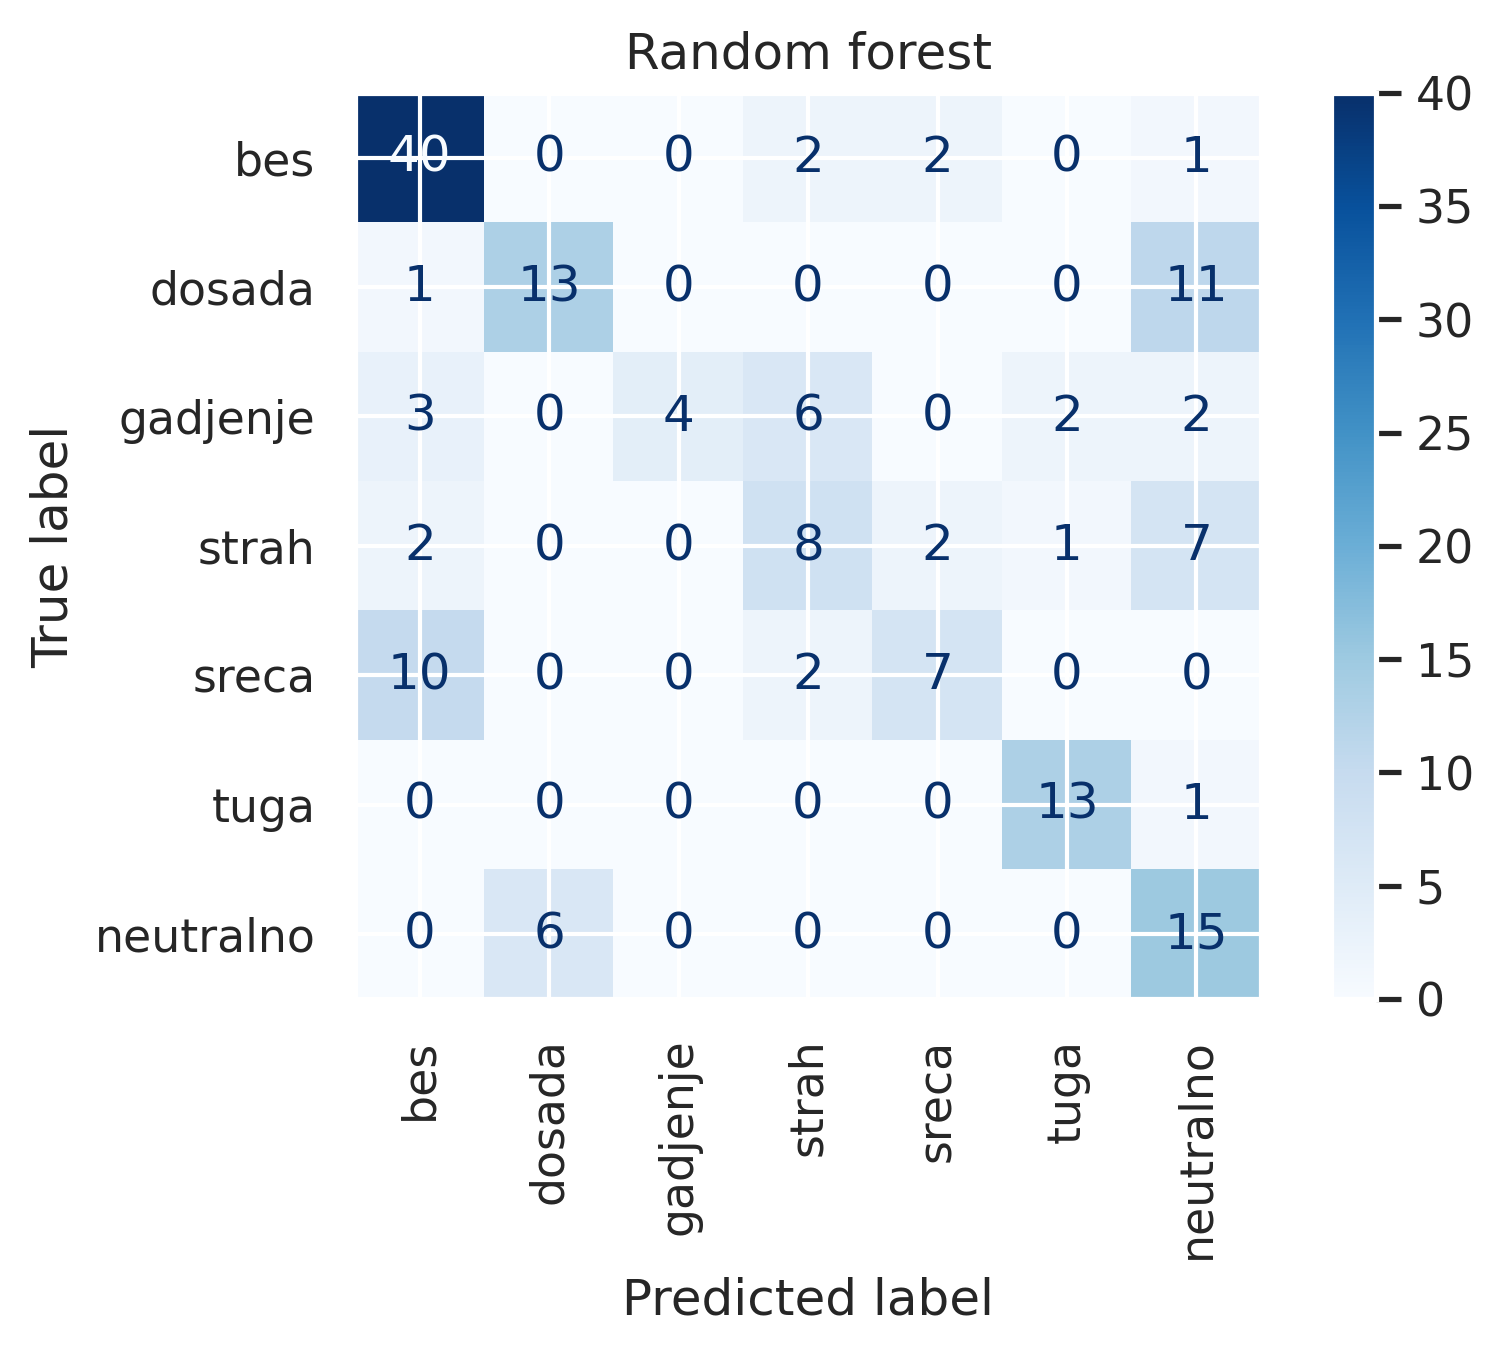

In [70]:

# for title, normalize in titles_options:
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
    display_labels=["bes", "dosada", "gadjenje", "strah", "sreca", "tuga", "neutralno"],
    xticks_rotation="vertical",
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Random forest")
    

# print(title)
print(disp.confusion_matrix)

plt.show()


In [71]:
# print (np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

In [76]:
cros_val = cross_val_score(clf, X, y, cv=20)

2023/07/28 08:12:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0389108b9c634fab987a501ded1b0b5a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


2023/07/28 08:12:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/zarko/.local/lib/python3.9/site-packages/mlflow/utils/autologging_utils/safety.py:530: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel()."
2023/07/28 08:12:41 WARNING mlflow.sklearn.utils: roc_auc_score failed. The metric training_roc_auc will not be recorded. Metric error: too many indices for array: array is 2-dimensional, but 3 were indexed
2023/07/28 08:12:43 WARNING mlflow.models.model: Logging model metadata to the tracking server has failed. The model artifacts have been logged successfully under /home/zarko/PFE/prepoznavanje-emocija/lk-s-2023-prepoznavanje-emocija/mlruns/0/0389108b9c634fab987a501ded1b0b5a/artifacts. Set logging level to DEBUG via `logging.getLogger("mlflow").setLevel(logging.DEBUG)` to see the full traceback.
2023/07/28 08:12:43 INFO mlflow.utils.autol

In [77]:
print(cros_val)

[0.55555556 0.59259259 0.77777778 0.74074074 0.66666667 0.59259259
 0.48148148 0.55555556 0.48148148 0.62962963 0.74074074 0.7037037
 0.66666667 0.62962963 0.55555556 0.65384615 0.53846154 0.53846154
 0.61538462 0.5       ]


In [78]:
print(np.var(cros_val))
print(np.mean(cros_val))

0.007255744677397098
0.6108262108262108
